In [1]:
# Load the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()
from scipy import stats
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# import datasets
kc = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

#Checking that the import was successful.
kc.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [3]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


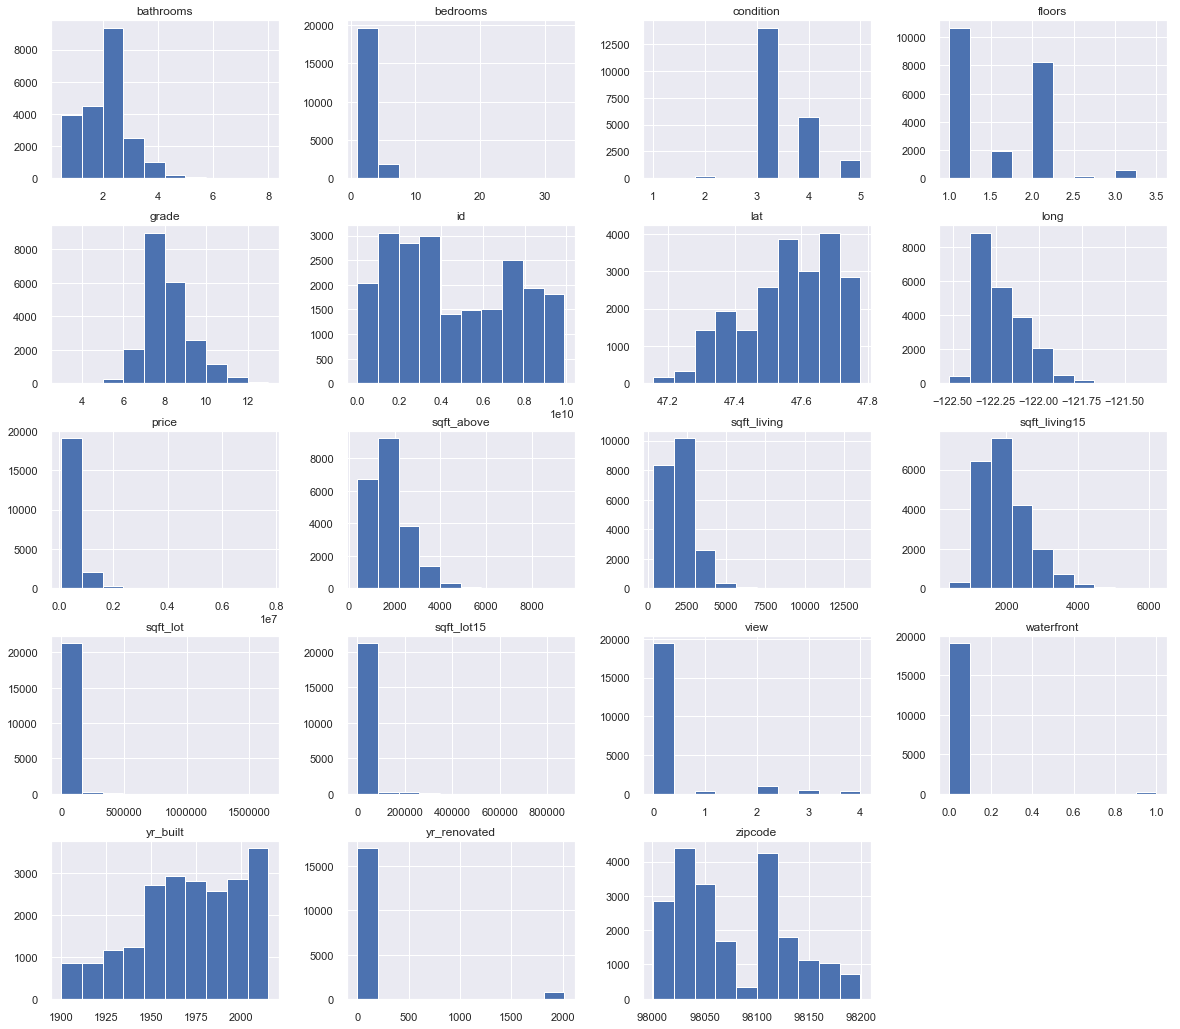

In [4]:
#Use pandas histogram plotting to plot histograms for all the variables in the dataset

kc.hist(figsize=(20,18));

Use only the continuous variables for visualizing probability densities and KDE's

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


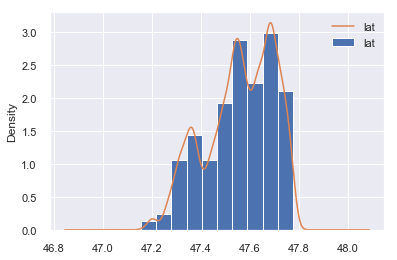

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


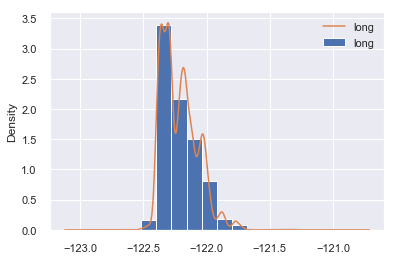

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


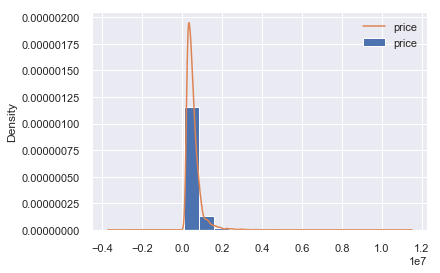

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


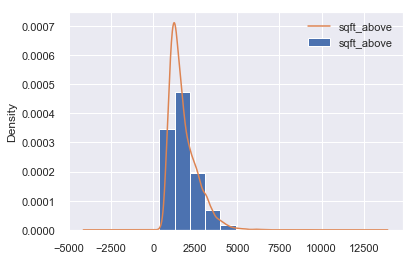

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


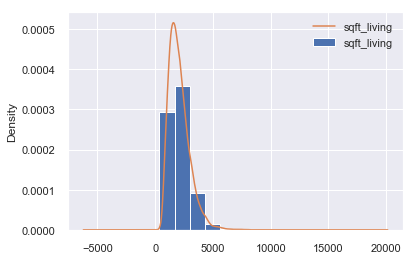

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


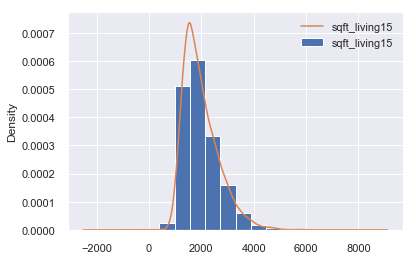

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


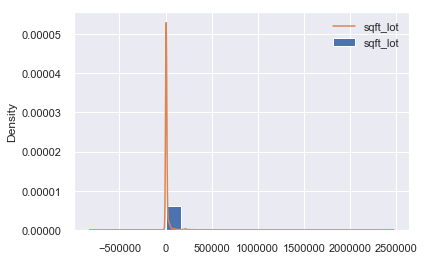

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


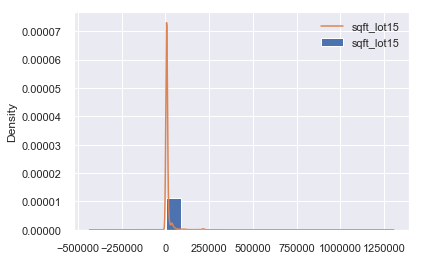

In [5]:
for column in ['lat',
               'long', 'price', "sqft_above", 'sqft_living',
              "sqft_living15", "sqft_lot", "sqft_lot15",
              ]:
    kc[column].plot.hist(normed=True)
    kc[column].plot.kde(label=column)
    plt.legend()
    plt.show()

Build joint plots to check for the linearity assumption between predictors and target variable

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


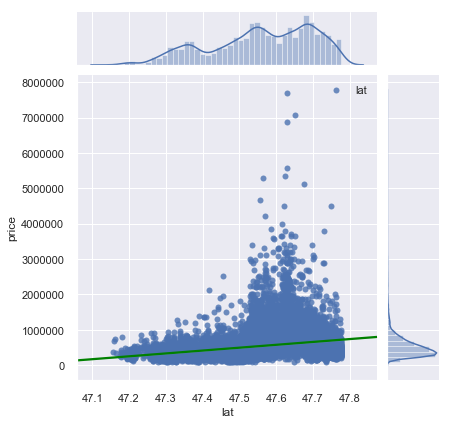

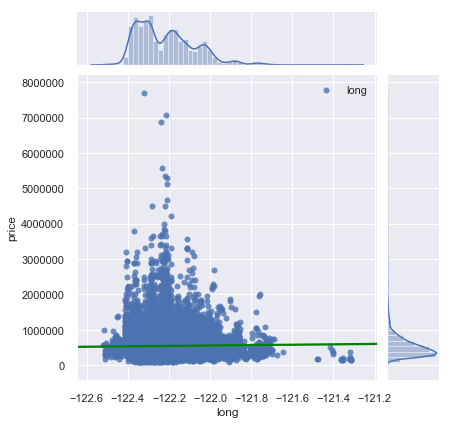

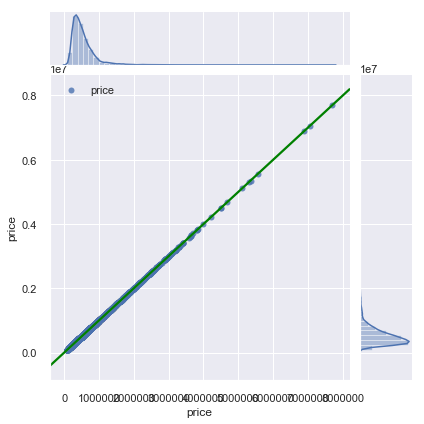

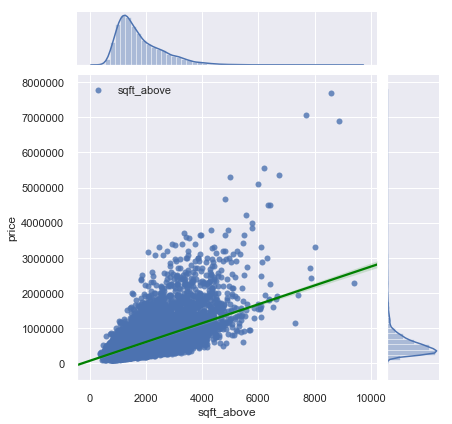

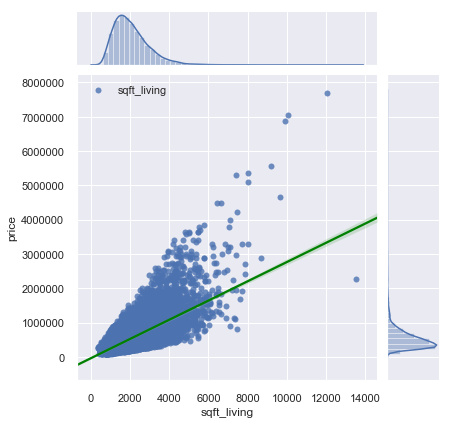

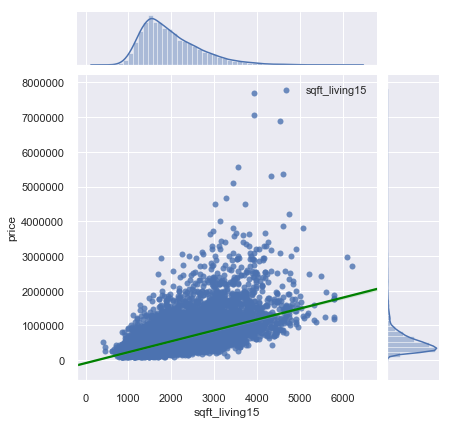

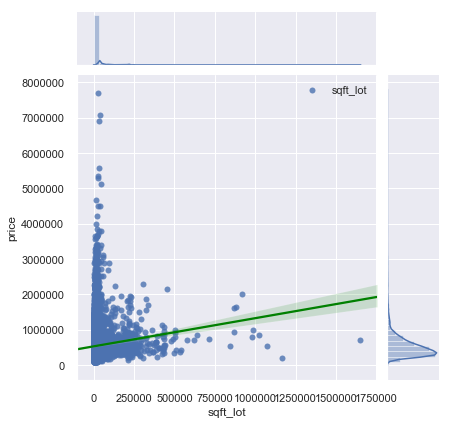

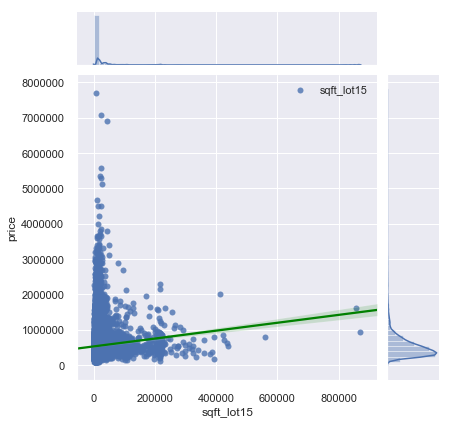

In [6]:
for column in ['lat',
               'long', 'price', "sqft_above", 'sqft_living',
              "sqft_living15", "sqft_lot", "sqft_lot15",
              ]:
    sns.jointplot(x=column, y="price",
                 data=kc,
                 kind="reg",
                 label=column,
                 joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()


In [7]:
# drop duplicated ID keep older most recent listing
kc['id'].drop_duplicates(keep='last',inplace=True)

In [8]:
kc['date'] = pd.to_datetime(kc['date'])
kc['date'].head(2)

0   2014-10-13
1   2014-12-09
Name: date, dtype: datetime64[ns]

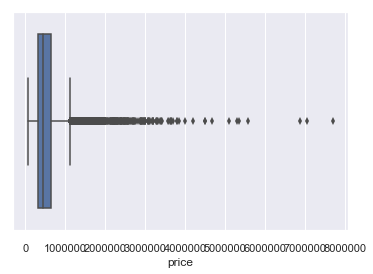

In [9]:
sns.boxplot(kc['price']);

In [10]:
kc['price'] = np.log10(kc['price'])

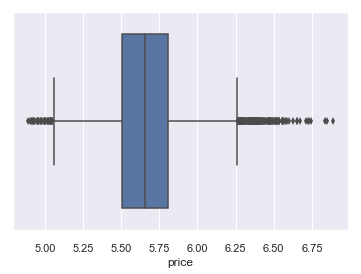

In [11]:
sns.boxplot(kc['price']);

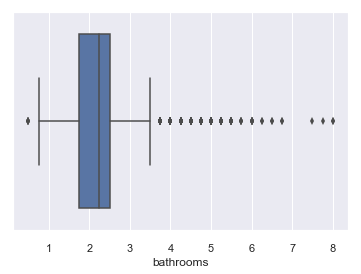

In [12]:
# deal with bathrooms and bedrooms outliers first
sns.boxplot(kc['bathrooms']);

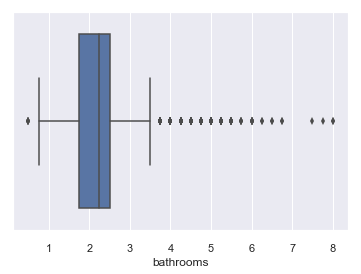

In [13]:
sns.boxplot(kc['bathrooms']);

In [14]:
# eliminate rows with outlier categorical data based upon IQR
kc= kc[(kc['bathrooms'] <= 3.5) & (kc['bathrooms'] >=0.75)]

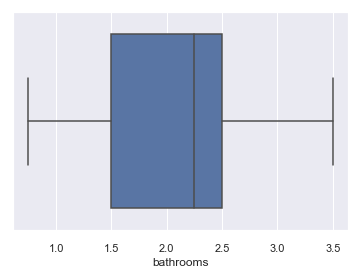

In [15]:
sns.boxplot(kc['bathrooms']);

In [18]:
#normalize the data
kc["bathrooms"] = (kc["bathrooms"]- kc["bathrooms"].mean()) / kc["bathrooms"].std()

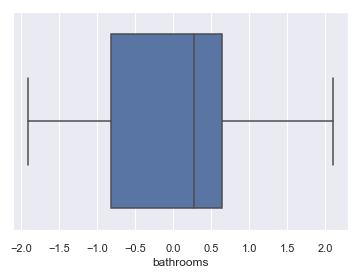

In [19]:
sns.boxplot(kc["bathrooms"]);

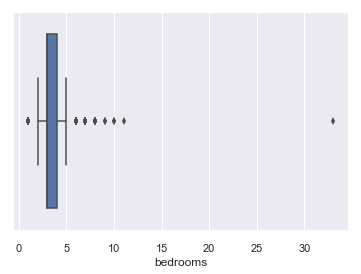

In [20]:
sns.boxplot(kc['bedrooms']);

In [21]:
# eliminate rows with outlier categorical data based upon IQR
kc= kc[(kc['bedrooms'] <= 5) & (kc['bedrooms'] >=2)]

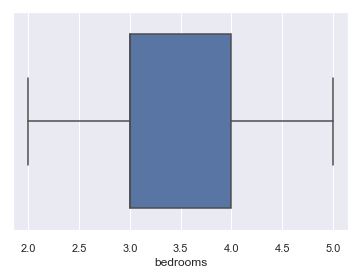

In [22]:
sns.boxplot(kc['bedrooms']);

In [23]:
#normalize the data
kc["bedrooms"] = (kc["bedrooms"]- kc["bedrooms"].mean()) / kc["bedrooms"].std()

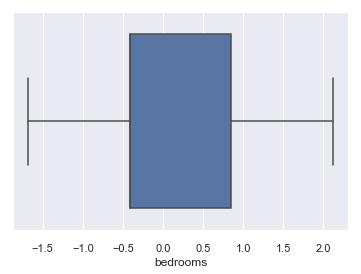

In [24]:
sns.boxplot(kc['bedrooms']);

In [ ]:
# a little bit better for price now, not much though
sns.boxplot(kc['price']);

In [ ]:
kc.loc[kc['sqft_basement'] == '?',['sqft_living','sqft_above']];

In [ ]:
kc.loc[(kc["sqft_basement"] == '?') & (kc["sqft_above"]!=kc['sqft_living'])];

In [ ]:
#Replace ? with difference between sqft_above and sqft_living

kc['sqft_basement'].replace(to_replace='?', value = kc['sqft_above']-kc['sqft_living'], inplace=True)
kc.describe()

In [ ]:
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'])

In [ ]:
kc = kc.drop(["waterfront", "sqft_living",
             "lat", "long", "view","sqft_living15",
             "sqft_lot15","id","yr_renovated"], axis=1)


In [ ]:
kc.head(2)

In [ ]:
kc['bedrooms']= kc['bedrooms'].astype('category')

In [ ]:
kc['bathrooms']= kc['bathrooms'].astype('category')

In [ ]:
kc['floors']= kc['floors'].astype('category')

In [ ]:
kc['condition']= kc['condition'].astype('category')

In [ ]:
kc['grade']= kc['grade'].astype('category')

In [ ]:
kc['yr_built']= kc['yr_built'].astype('category')

In [ ]:
kc['zipcode']= kc['zipcode'].astype('category')

In [ ]:
bath_dummies = pd.get_dummies(kc["bathrooms"], prefix="bath")

In [ ]:
bedroom_dummies = pd.get_dummies(kc["bedrooms"], prefix="bed")

In [ ]:
floor_dummies= pd.get_dummies(kc["floors"], prefix="flr")

In [ ]:
condition_dummies = pd.get_dummies(kc["condition"], prefix="con")

In [ ]:
grade_dummies= pd.get_dummies(kc["grade"], prefix="grd")

In [ ]:
yr_built_dummies= pd.get_dummies(kc['yr_built'], prefix="yr")

In [ ]:
zipcode_dummies= pd.get_dummies(kc['zipcode'], prefix="zip")

In [ ]:
kc = kc.drop([
    "bathrooms","bedrooms","floors",
    'condition','grade', 'yr_built', "zipcode"],
    axis=1)

In [ ]:
kc = pd.concat([kc, bath_dummies, bedroom_dummies, floor_dummies, condition_dummies, grade_dummies, zipcode_dummies, yr_built_dummies], axis=1)

In [ ]:
kc.describe()

In [ ]:
kc.info()